In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
df=pd.read_csv('C:/Users/Dell/Desktop/Interview.csv')

In [2]:
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import feature_selection
from sklearn import tree
from sklearn import utils
from sklearn import naive_bayes
from sklearn import feature_selection
from sklearn import ensemble
from sklearn import linear_model
from sklearn import neighbors
from sklearn import model_selection
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import re


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 28 columns):
Date of Interview                                                                                     1233 non-null object
Client name                                                                                           1234 non-null object
Industry                                                                                              1233 non-null object
Location                                                                                              1233 non-null object
Position to be closed                                                                                 1233 non-null object
Nature of Skillset                                                                                    1233 non-null object
Interview Type                                                                                        1233 non-null object
Name(Cand ID)                   

#### Observations:
#### Looking into the data set , we can say that we have 1234 records with 28 columns/features
#### Firstly, we can clearly eleminate the last 5 columns , which have only null values
#### Secondly, we need to shorten and modify the column in order to make the data more interpretable
#### We need to clean the data before modelling

In [4]:
df.drop(["Unnamed: 23",'Unnamed: 24','Unnamed: 25','Unnamed: 26','Unnamed: 27'],axis=1,inplace=True)
df.columns=['date','client','industry','location','closedpos','skills','type','id','gender','currloc','jobloc','venue','natloc','permit','meeting','call','no.','resume','clear','letter','expat','obsat','marit']

# Date column


#### Converting the string format to date format 
#### Extracting year, month, day and day of week from the date column and appending the columns to the dataset

In [5]:
df.drop(df.index[df["date"].isnull()],axis=0,inplace=True)
df.date=df.date.str.replace(" ","")
df.date=df.date.str.replace(r'&\d[\d].\d\d\w\w','')
df.date=df.date.str.replace(r'&\d.\d\d\w\w','')
df.date=df.date.str.replace('/','.')
df.date=df.date.str.replace('-Apr-','.04.')
df.date=df.date.str.replace('–Apr-','.04.')
df.date=df.date.str.replace('Apr','.04.')
df.date=df.date.str.replace(r'\W16','.2016')
df.date=df.date.str.replace(r'\W15','.2015')
df.date=df.date.str.replace('-','.')
from datetime import datetime
df['date']=pd.to_datetime(df['date'],format='%d.%m.%Y')
df["date"]=df["date"].dt.date


In [6]:
df["date"].unique()

array([datetime.date(2015, 2, 13), datetime.date(2015, 6, 19),
       datetime.date(2015, 6, 23), datetime.date(2015, 6, 29),
       datetime.date(2015, 6, 25), datetime.date(2016, 5, 25),
       datetime.date(2016, 12, 4), datetime.date(2016, 4, 13),
       datetime.date(2016, 2, 27), datetime.date(2016, 5, 7),
       datetime.date(2016, 5, 5), datetime.date(2016, 5, 4),
       datetime.date(2016, 4, 21), datetime.date(2016, 4, 22),
       datetime.date(2016, 4, 23), datetime.date(2016, 4, 15),
       datetime.date(2016, 4, 19), datetime.date(2016, 4, 20),
       datetime.date(2016, 4, 25), datetime.date(2016, 4, 18),
       datetime.date(2016, 5, 11), datetime.date(2016, 5, 10),
       datetime.date(2016, 4, 12), datetime.date(2017, 4, 12),
       datetime.date(2018, 4, 12), datetime.date(2019, 4, 12),
       datetime.date(2020, 4, 12), datetime.date(2021, 4, 12),
       datetime.date(2022, 4, 12), datetime.date(2023, 4, 12),
       datetime.date(2016, 5, 8), datetime.date(2016, 3, 1

In [7]:
df2=pd.DataFrame({"year":[],"month":[],"day":[]})
df=pd.concat([df,df2],sort=False)
df2=pd.DataFrame({"dayofyear":[]})
df=pd.concat([df,df2],sort=False)
df2=pd.DataFrame({"dayofweek":[]})
df=pd.concat([df,df2],sort=False)
for i,s in df.iterrows():
    k=df["date"][i].timetuple()
    df["year"][i]=k.tm_year
    df["month"][i]=k.tm_mon
    df["day"][i]=k.tm_mday
    df["dayofweek"][i]=datetime.isoweekday(df["date"][i])
    df.dayofyear[i]=k.tm_yday

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1233 entries, 0 to 1232
Data columns (total 28 columns):
date         1233 non-null object
client       1233 non-null object
industry     1233 non-null object
location     1233 non-null object
closedpos    1233 non-null object
skills       1233 non-null object
type         1233 non-null object
id           1233 non-null object
gender       1233 non-null object
currloc      1233 non-null object
jobloc       1233 non-null object
venue        1233 non-null object
natloc       1233 non-null object
permit       1029 non-null object
meeting      986 non-null object
call         986 non-null object
no.          986 non-null object
resume       985 non-null object
clear        985 non-null object
letter       988 non-null object
expat        1228 non-null object
obsat        1233 non-null object
marit        1233 non-null object
year         1233 non-null float64
month        1233 non-null float64
day          1233 non-null float64
dayofyear   

# Observed attendance column

In [9]:
df.obsat.replace({'No':'N','Yes':'Y','yes':'Y','no':'N','yes ':'Y','No ':'N','NO':'N','no ':'N'},inplace=True)
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.loc[:,'obsat']=le.fit_transform(df.loc[:,'obsat'])

In [10]:
for i in df.month.unique():
    print(i,(df[(df['month']==i) & (df.obsat==1)].shape[0]),(df[(df['month']==i) & (df.obsat==0)].shape[0]))    

2.0 194 117
6.0 80 41
5.0 112 40
12.0 70 35
4.0 138 108
3.0 37 26
11.0 13 12
8.0 29 16
9.0 27 16
1.0 83 39


In [11]:
for i in df.dayofweek.unique():
    print(i,(df[(df['dayofweek']==i) & (df.obsat==1)].shape[0]),(df[(df['dayofweek']==i) & (df.obsat==0)].shape[0]))    

5.0 113 102
2.0 65 29
1.0 25 17
4.0 105 52
3.0 124 68
7.0 75 35
6.0 276 147


In [12]:
for i in df.year.unique():
    print (i)
    print(df[(df['year']==i) & (df.obsat==1)].shape[0])
    print(df[(df['year']==i) & (df.obsat==0)].shape[0])
    


2015.0
110
98
2016.0
664
350
2017.0
1
0
2018.0
0
1
2019.0
1
0
2020.0
1
0
2021.0
0
1
2022.0
1
0
2023.0
1
0
2014.0
4
0


# native location column


In [13]:
df["natloc"].unique()

array(['Hosur', 'Trichy', 'Chennai', 'Gurgaon', 'Noida', 'Delhi /NCR',
       'Cochin', 'Trivandrum', 'Bangalore', 'Coimbatore', 'Salem',
       'Tanjore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Allahabad',
       'Panjim', 'Cuttack', 'Visakapatinam', 'Belgaum', 'Patna',
       'Chitoor', 'Anantapur', 'Warangal', 'Ahmedabad', 'Kurnool',
       'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Agra',
       'Bhubaneshwar', 'Ghaziabad', 'Baddi', 'Tuticorin', 'Tirupati',
       'Faizabad', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Delhi',
       'Kanpur', 'Lucknow', '- Cochin- '], dtype=object)

In [14]:
df['natloc'].replace({'Delhi /NCR':'Delhi','- Cochin- ':'Cochin'},inplace=True)

In [15]:
df['natloc'].unique()

array(['Hosur', 'Trichy', 'Chennai', 'Gurgaon', 'Noida', 'Delhi',
       'Cochin', 'Trivandrum', 'Bangalore', 'Coimbatore', 'Salem',
       'Tanjore', 'Hyderabad', 'Mumbai', 'Pune', 'Kolkata', 'Allahabad',
       'Panjim', 'Cuttack', 'Visakapatinam', 'Belgaum', 'Patna',
       'Chitoor', 'Anantapur', 'Warangal', 'Ahmedabad', 'Kurnool',
       'Vijayawada', 'Vellore', 'Pondicherry', 'Nagercoil', 'Agra',
       'Bhubaneshwar', 'Ghaziabad', 'Baddi', 'Tuticorin', 'Tirupati',
       'Faizabad', 'Ambur', 'Chandigarh', 'Mysore', 'Hissar', 'Kanpur',
       'Lucknow'], dtype=object)

# client

In [16]:
df['client'].replace({'Hospira':'H','Aon Hewitt':'A','UST':'U','Standard Chartered Bank':'S','ANZ':'A1','Pfizer':'P','Standard Chartered Bank Chennai':'S','Aon hewitt Gurgaon':'A','Astrazeneca':'As','Flextronics':'F','Prodapt':'P1','Williams Lea':'W','Barclays':'B','Hewitt':'A','Woori Bank':'Wb'},inplace=True)

# Meeting 

In [17]:
for i in df["meeting"].unique():
            print(i,(df[(df['meeting']==i) & (df.obsat==1)].shape[0]),(df[(df['meeting']==i) & (df.obsat==0)].shape[0]),sep=" ")    



Yes 670 279
Na 3 17
No 0 6
nan 0 0
yes 4 1
Not Sure 0 1
cant Say 0 1
Not sure 0 4


In [18]:
df.meeting.isnull().sum()


247

In [19]:
df.meeting.replace({'Yes':'Y','Na':'N','No':'N','yes':'Y','Not sure':'N','Not Sure':'N','cant Say':'N'},inplace=True)


In [20]:
df.drop(df.index[df.meeting.isnull()],axis=0,inplace=True)

In [21]:
for i in df["meeting"].unique():
            print(i,(df[(df['meeting']==i) & (df.obsat==1)].shape[0]),(df[(df['meeting']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 674 280
N 3 29


# Industry

In [22]:
df['industry'].replace({'Pharmaceuticals':'P','IT Services':'I','IT Products and Services':'I','Electronics':'E','Telecom':'E','IT':'I','BFSI':'B'},inplace=True)

# Permit

In [23]:
for i in df["permit"].unique():
            print(i,(df[(df['permit']==i) & (df.obsat==1)].shape[0]),(df[(df['permit']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 665 252
nan 0 0
No 3 33
Not yet 3 16
Yet to confirm 0 4
yes 3 1
Na 3 2


In [24]:
df.drop(df.index[df.permit.isnull()],axis=0,inplace=True)
df.permit.replace({'Yes':'Y','No':'N','Not yet':'N','Yet to confirm':'N','yes':'Y','Na':'N'},inplace=True)

In [25]:
for i in df["permit"].unique():
            print(i,(df[(df['permit']==i) & (df.obsat==1)].shape[0]),(df[(df['permit']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 668 253
N 9 55


# Resume

In [26]:
for i in df["resume"].unique():
            print(i,(df[(df['resume']==i) & (df.obsat==1)].shape[0]),(df[(df['resume']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 668 272
No 2 14
No- will take it soon 0 1
nan 0 0
Not yet 1 1
yes 2 0
Na 3 16
Not Yet 0 4


In [27]:
df.resume.isnull().sum()


1

In [28]:
df['resume'].replace({'Yes':'Y', 'No':'N', 'No- will take it soon':'N', 'Not yet':'N', 'yes':'Y', 'Na':'N',
       'Not Yet':'N'},inplace=True)

In [29]:
df.drop(df.index[df.resume.isnull()],axis=0,inplace=True)


In [30]:
for i in df["resume"].unique():
            print(i,(df[(df['resume']==i) & (df.obsat==1)].shape[0]),(df[(df['resume']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 670 272
N 6 36


# Expat

In [31]:
for i in df["expat"].unique():
            print(i,(df[(df['expat']==i) & (df.obsat==1)].shape[0]),(df[(df['expat']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 651 231
Uncertain 21 23
No 1 54
yes 1 0
11:00 AM 1 0
10.30 Am 1 0


In [32]:
df['expat'].replace({'Yes':'Y','No':'N','yes':'Y','11:00 AM':'Y','10.30 Am':'Y'},inplace=True)


In [33]:
for i,series in df.iterrows():
        if((series.expat=='Uncertain') & (series.obsat==1)):
            df.loc[i,'expat']='Y'
        elif ((series.expat=='Uncertain') &( series.obsat==0)):
            df.loc[i,'expat']='N'

In [34]:
for i in df["expat"].unique():
            print(i,(df[(df['expat']==i) & (df.obsat==1)].shape[0]),(df[(df['expat']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 675 231
N 1 77


# letter

In [35]:
for i in df["letter"].unique():
            print(i,(df[(df['letter']==i) & (df.obsat==1)].shape[0]),(df[(df['letter']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 666 266
Havent Checked 1 0
No 2 13
Need To Check 0 3
Not sure 1 0
Not Sure 0 8
Not yet 0 2
no 1 0
yes 2 0
Na 3 16


In [36]:
df['letter'].replace({'Yes':'Y', 'Havent Checked':'Y', 'No':'N', 'Need To Check':'N', 'Not sure':'Y','Not Sure':'N', 'Not yet':'N', 'no':'N', 'yes':'Y', 'Na':'N'},inplace=True)

In [37]:
for i in df["letter"].unique():
            print(i,(df[(df['letter']==i) & (df.obsat==1)].shape[0]),(df[(df['letter']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 670 266
N 6 42


#  Clear

In [38]:
for i in df["clear"].unique():
            print(i,(df[(df['clear']==i) & (df.obsat==1)].shape[0]),(df[(df['clear']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 668 278
No 1 13
No- I need to check 1 1
yes 2 0
Na 3 16
no 1 0


In [39]:
df['clear'].replace({'Yes':'Y', 'No':'N', 'No- I need to check':'N', 'yes':'Y', 'Na':'N', 'no':'N'},inplace=True)

In [40]:
for i in df["clear"].unique():
            print(i,(df[(df['clear']==i) & (df.obsat==1)].shape[0]),(df[(df['clear']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 670 278
N 6 30


# No.

In [41]:
for i in df["no."].unique():
            print(i,(df[(df['no.']==i) & (df.obsat==1)].shape[0]),(df[(df['no.']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 665 271
No 7 19
No I have only thi number 0 2
yes 1 0
Na 3 16


In [42]:
df['no.'].replace({'Yes':'Y', 'No':'N', 'No I have only thi number':'N', 'yes':'Y', 'Na':'N'},inplace=True)

In [43]:
for i in df["no."].unique():
            print(i,(df[(df['no.']==i) & (df.obsat==1)].shape[0]),(df[(df['no.']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 666 271
N 10 37


 # Call

In [44]:
for i in df["call"].unique():
            print(i,(df[(df['call']==i) & (df.obsat==1)].shape[0]),(df[(df['call']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Yes 665 286
No 3 6
No Dont 1 0
yes 4 0
Na 3 16


In [45]:
df['call'].replace({'Yes':'Y', 'No':'N', 'No Dont':'Y', 'yes':'Y', 'Na':'N'},inplace=True)

In [46]:
for i in df["call"].unique():
            print(i,(df[(df['call']==i) & (df.obsat==1)].shape[0]),(df[(df['call']==i) & (df.obsat==0)].shape[0]),sep=" ")    

Y 670 286
N 6 22


# Currloc

In [47]:
df.currloc.replace({'Chennai':'C','Gurgaon':'G','Bangalore':'B','Hyderabad':'H','Delhi':'D','chennai':'C','- Cochin- ':'K','Noida':'N','CHENNAI':'C','chennai ':'C'},inplace=True)

# Venue

In [48]:
df.venue.replace({'Hosur':'H', 'Gurgaon':'G', 'Bangalore':'B', 'Chennai':'C', 'Hyderabad':'H',
       '- Cochin- ':'K', 'Noida':'N'},inplace=True)

# Jobloc

In [49]:
df.jobloc.replace({'Hosur':'H', 'Bangalore':'B', 'Chennai':"C", 'Gurgaon':'G', 'Visakapatinam':'V',
       '- Cochin- ':'K', 'Noida':'N'},inplace=True)

# Type

In [50]:
df['type'].replace({'Scheduled Walkin':'SW', 'Scheduled ':'S', 'Walkin':'W', 'Scheduled Walk In':'SW',
       'Walkin ':'W'},inplace=True)

# Location

In [51]:
df.location.replace({'Chennai':'C', 'Gurgaon':'G', 'Bangalore':'B', 'Hyderabad':'H', 'Gurgaonr':'G',
       'Delhi':'D', 'chennai':'C', '- Cochin- ':'K', 'Noida':'N', 'CHENNAI':'C', 'chennai ':'C'},inplace=True)

# Closedpos

In [52]:
df.closedpos.replace({'Production- Sterile':'P','Selenium testing':'S','Dot Net':'D','AML':'A','Trade Finance':'T','Routine':'R','Niche':'N'},inplace=True)

In [53]:
df.head()

,date,client,industry,location,closedpos,skills,type,id,gender,currloc,...,clear,letter,expat,obsat,marit,year,month,day,dayofyear,dayofweek
0,2015-02-13,H,P,C,P,Routine,SW,Candidate 1,Male,C,...,Y,Y,Y,0,Single,2015.0,2.0,13.0,44.0,5.0
1,2015-02-13,H,P,C,P,Routine,SW,Candidate 2,Male,C,...,Y,Y,Y,0,Single,2015.0,2.0,13.0,44.0,5.0
3,2015-02-13,H,P,C,P,Routine,SW,Candidate 4,Male,C,...,Y,Y,N,0,Single,2015.0,2.0,13.0,44.0,5.0
4,2015-02-13,H,P,C,P,Routine,SW,Candidate 5,Male,C,...,Y,Y,N,0,Married,2015.0,2.0,13.0,44.0,5.0
5,2015-02-13,A,I,G,S,Routine,SW,Candidate 6,Male,G,...,Y,Y,Y,1,Single,2015.0,2.0,13.0,44.0,5.0


#### Dropping the id column as this is similar to the serial number

In [54]:
df.drop("id",axis=1,inplace=True)

In [55]:
df.head()

,date,client,industry,location,closedpos,skills,type,gender,currloc,jobloc,...,clear,letter,expat,obsat,marit,year,month,day,dayofyear,dayofweek
0,2015-02-13,H,P,C,P,Routine,SW,Male,C,H,...,Y,Y,Y,0,Single,2015.0,2.0,13.0,44.0,5.0
1,2015-02-13,H,P,C,P,Routine,SW,Male,C,B,...,Y,Y,Y,0,Single,2015.0,2.0,13.0,44.0,5.0
3,2015-02-13,H,P,C,P,Routine,SW,Male,C,C,...,Y,Y,N,0,Single,2015.0,2.0,13.0,44.0,5.0
4,2015-02-13,H,P,C,P,Routine,SW,Male,C,B,...,Y,Y,N,0,Married,2015.0,2.0,13.0,44.0,5.0
5,2015-02-13,A,I,G,S,Routine,SW,Male,G,G,...,Y,Y,Y,1,Single,2015.0,2.0,13.0,44.0,5.0


#### Label encoding all columns except date,skills and obseved attendance

In [56]:
for i in df.drop(["date","skills","obsat"],axis=1):
    df.loc[:,i]=le.fit_transform(df.loc[:,i])

In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 984 entries, 0 to 1231
Data columns (total 27 columns):
date         984 non-null object
client       984 non-null int32
industry     984 non-null int32
location     984 non-null int32
closedpos    984 non-null int32
skills       984 non-null object
type         984 non-null int32
gender       984 non-null int32
currloc      984 non-null int32
jobloc       984 non-null int32
venue        984 non-null int32
natloc       984 non-null int32
permit       984 non-null int32
meeting      984 non-null int32
call         984 non-null int32
no.          984 non-null int32
resume       984 non-null int32
clear        984 non-null int32
letter       984 non-null int32
expat        984 non-null int32
obsat        984 non-null int32
marit        984 non-null int32
year         984 non-null int64
month        984 non-null int64
day          984 non-null int64
dayofyear    984 non-null int64
dayofweek    984 non-null int64
dtypes: int32(20), int64(5),

# Feature importance 

###### Seeing the feature importance using random forest classifier

In [58]:
X=df.drop(["skills","date","obsat"],axis=1)
y=df["obsat"]

In [66]:
def get_importance(X,y):
    rf=ensemble.RandomForestClassifier()
    rf.fit(X,y)
    return pd.DataFrame(rf.feature_importances_,columns=["Importance"],index=X.columns).sort_values("Importance",ascending=False)


### Function to plot graph to see how Precision varies with no of features using DECISION TREE (RFECV)

In [67]:
def modelstats1(X,y):
    np.random.seed(42)
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=42)
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression(C=10))
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testpredicti
        (metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

### Function to plot graph to see how Precision varies with no. of features using Random Forest Classifier

In [68]:
imp=get_importance(X,y)
imp

,Importance
natloc,0.197052
expat,0.159480
gender,0.084239
marit,0.067801
day,0.056067
dayofyear,0.052196
permit,0.051735
type,0.037463
dayofweek,0.035400
resume,0.030088


In [69]:
def rfe_selection(X,y):
    np.random.seed(42)
    rf=ensemble.RandomForestClassifier()
    train=[]
    test=[]
    loss=[]
    m=[rf]
    s=["Random Forest"]
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    for j in range(0,len(m)):
        #print(s[j])
        model=m[j]
        for i in range(1,30):
            rfecv=feature_selection.RFE(estimator=model,n_features_to_select=i)
            rfecv.fit(X_train,y_train)
            cols=X.columns[rfecv.get_support()]
            X_=X_train[cols]
            X_t=X_test[cols]
            rfecv.fit(X_,y_train)
            
            #model.fit(X_,y)
            #print(cols)
            train.append(metrics.precision_score(y_train,rfecv.predict(X_)))
            test.append(metrics.precision_score(y_test,rfecv.predict(X_t)))
            loss.append(metrics.log_loss(y_test,rfecv.predict_proba(X_t)))
    plt.figure()
    plt.plot(np.arange(1,30,1),train)
    plt.plot(np.arange(1,30,1),test)
    plt.title("Optimal Number of Features (Random Forest) ")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.7,.8)
    plt.show()

### Function to plot graph to see how Precision varies with no of features using DECISION TREE (RFECV)

In [70]:
from sklearn import feature_selection
def get_feat_dt(X,y):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=tree.DecisionTreeClassifier()
    n=X.shape[1]
    tr_score=[]
    ts_score=[]
    for i in range(1,n):
        rfecv=feature_selection.RFE(model,n_features_to_select=i)
        rfecv.fit(X_train,y_train)
        col=X.columns[rfecv.get_support()]
        model.fit(X_train[col],y_train)
        tr_p=model.predict(X_train[col])
        ts_p=model.predict(X_test[col])
        tr_score.append(metrics.precision_score(y_train,tr_p))
        ts_score.append(metrics.precision_score(y_test,ts_p))
    plt.figure()
    plt.plot(range(1,n),tr_score)
    plt.plot(range(1,n),ts_score)
    plt.xlabel("min_features using Decison Tree")
    plt.ylabel("Precision")
    plt.legend(['train score', 'test score'], loc='upper left')
    plt.ylim(.7,.8)
    plt.show()
    

### Function to calculate the scores of different ML models on the label encoded Data

In [71]:
def modelstats1(X,y):
    np.random.seed(42)
    Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=.25,random_state=42)
    stats=[]
    modelnames=["LR","DecisionTree","KNN","NB"]
    models=list()
    models.append(linear_model.LogisticRegression(C=10))
    models.append(tree.DecisionTreeClassifier())
    models.append(neighbors.KNeighborsClassifier())
    models.append(naive_bayes.GaussianNB())
    for name,model in zip(modelnames,models):
        if name=="KNN":
            k=[l for l in range(5,17,2)]
            grid={"n_neighbors":k}
            grid_obj = GridSearchCV(estimator=model,param_grid=grid,scoring="f1")
            grid_fit =grid_obj.fit(Xtrain,ytrain)
            model = grid_fit.best_estimator_
            model.fit(Xtrain,ytrain)
            name=name+"("+str(grid_fit.best_params_["n_neighbors"])+")"
            print(grid_fit.best_params_)
        else:
            model.fit(Xtrain,ytrain)
        trainprediction=model.predict(Xtrain)
        testprediction=model.predict(Xtest)
        scores=list()
        scores.append(name+"-train")
        scores.append(metrics.accuracy_score(ytrain,trainprediction))
        scores.append(metrics.precision_score(ytrain,trainprediction))
        scores.append(metrics.recall_score(ytrain,trainprediction))
        scores.append(metrics.roc_auc_score(ytrain,trainprediction))
        stats.append(scores)
        scores=list()
        scores.append(name+"-test")
        scores.append(metrics.accuracy_score(ytest,testprediction))
        scores.append(metrics.precision_score(ytest,testprediction))
        scores.append(metrics.recall_score(ytest,testprediction))
        scores.append(metrics.roc_auc_score(ytest,testprediction))
        stats.append(scores)
    
    colnames=["MODELNAME","ACCURACY","PRECISION","RECALL","AUC"]
    return pd.DataFrame(stats,columns=colnames)

### Function to calculate the score for the RandomForestClassifier models with different number of features

In [87]:
def run_rf(X,y,i):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=ensemble.RandomForestClassifier()
    rfecv=feature_selection.RFE(model,n_features_to_select=i)
    rfecv.fit(X_train,y_train)
    col=X.columns[rfecv.get_support()]
    model.fit(X_train[col],y_train)
    tr_p=model.predict(X_train[col])
    ts_p=model.predict(X_test[col])
    print (col)
    print(i)
    print("Train Set")
    print("precison",metrics.precision_score(y_train,tr_p)*100)
    print("recall",metrics.recall_score(y_train,tr_p)*100)
    print("accuracy",metrics.accuracy_score(y_train,tr_p)*100)
    print("log loss",metrics.log_loss(y_train,model.predict_proba(X_train[col])))
    print("Test Set")
    print("precision",metrics.precision_score(y_test,ts_p)*100)
    print("recall",metrics.recall_score(y_test,ts_p)*100)
    print("acuuracy",metrics.accuracy_score(y_test,ts_p)*100)
    print("log loss",metrics.log_loss(y_test,model.predict_proba(X_test[col])))
    
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(ts_p, y_test)
    roc_auc = auc(fpr, tpr)
    name="RF"
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    st='Receiver operating characteristic '+name
    plt.title(st)
    plt.legend(loc="lower right")
    plt.show()

###  Function to calculate the score for the RandomForestClassifier models with different number of features

In [86]:
def run_dt(X,y,i):
    np.random.seed(42)
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42)
    model=tree.DecisionTreeClassifier()
    rfecv=feature_selection.RFE(model,n_features_to_select=i)
    rfecv.fit(X_train,y_train)
    col=X.columns[rfecv.get_support()]
    model.fit(X_train[col],y_train)
    tr_p=model.predict(X_train[col])
    ts_p=model.predict(X_test[col])
    print(i)
    print("Train Set")
    print("precison",metrics.precision_score(y_train,tr_p)*100)
    print("recall",metrics.recall_score(y_train,tr_p)*100)
    print("accuracy",metrics.accuracy_score(y_train,tr_p)*100)
    print("log loss",metrics.log_loss(y_train,model.predict_proba(X_train[col])))
    print("Test Set")
    print("precision",metrics.precision_score(y_test,ts_p)*100)
    print("recall",metrics.recall_score(y_test,ts_p)*100)
    print("acuuracy",metrics.accuracy_score(y_test,ts_p)*100)
    print("log loss",metrics.log_loss(y_test,model.predict_proba(X_test[col])))
    
    from sklearn.metrics import roc_curve, auc
    fpr, tpr, thresholds = roc_curve(ts_p, y_test)
    roc_auc = auc(fpr, tpr)
    name="DT"
    plt.figure()
    plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    st='Receiver operating characteristic '+name
    plt.title(st)
    plt.legend(loc="lower right")
    plt.show()


### Graph of optimal no. of features in DecisionTreeClassifier

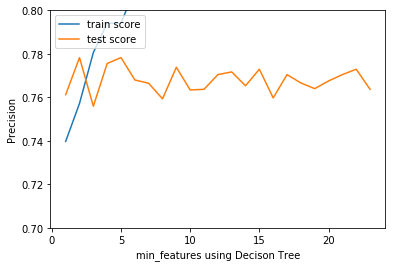

In [74]:
get_feat_dt(df.drop(["date","obsat","skills"],axis=1),df.obsat)

### Graph of optimal no of features using RFE selection method

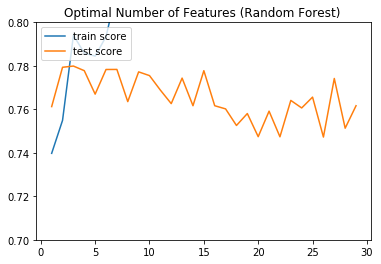

In [75]:
rfe_selection(df.drop(["date","skills","obsat"],axis=1),df.obsat)

### Running modelstats1 on all features of X

In [76]:
modelstats1(df.drop(["date","obsat","skills"],axis=1),df.obsat)

{'n_neighbors': 13}


,MODELNAME,ACCURACY,PRECISION,RECALL,AUC
0,LR-train,0.760163,0.748494,0.980276,0.628666
1,LR-test,0.784553,0.763636,0.994083,0.659379
2,DecisionTree-train,0.830623,0.835088,0.938856,0.765965
3,DecisionTree-test,0.699187,0.762431,0.816568,0.629063
4,KNN(13)-train,0.720867,0.722304,0.964497,0.575322
5,KNN(13)-test,0.686992,0.707207,0.928994,0.542419
6,NB-train,0.738482,0.735030,0.968442,0.601104
7,NB-test,0.756098,0.753488,0.958580,0.635134


### Running RandomForestClassifier on 8 features of X

Index(['client', 'gender', 'natloc', 'resume', 'expat', 'day', 'dayofyear',
       'dayofweek'],
      dtype='object')
8
Train Set
precison 80.87248322147651
recall 95.06903353057199
accuracy 81.16531165311653
log loss 0.38487106734615356
Test Set
precision 77.88944723618091
recall 91.71597633136095
acuuracy 76.42276422764228
log loss 1.8504838003446156


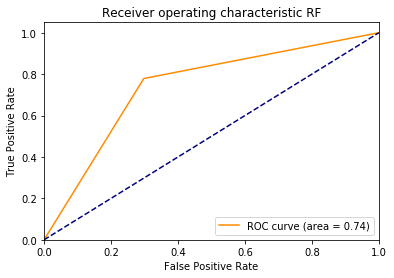

In [89]:
run_rf(df.drop(["date","obsat","skills"],axis=1),df.obsat,8)

### Running RandomForestClassifier on 9 features of X

Index(['client', 'gender', 'natloc', 'resume', 'expat', 'marit', 'day',
       'dayofyear', 'dayofweek'],
      dtype='object')
9
Train Set
precison 81.48148148148148
recall 95.46351084812623
accuracy 81.97831978319783
log loss 0.36361838764342136
Test Set
precision 77.27272727272727
recall 90.53254437869822
acuuracy 75.20325203252033
log loss 1.6008945897670446


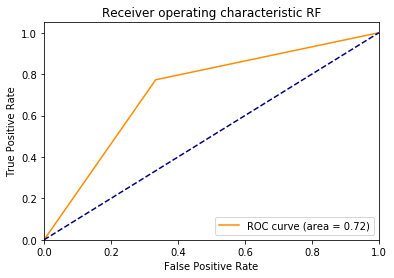

In [88]:
run_rf(df.drop(["date","obsat","skills"],axis=1),df.obsat,9)

In [80]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(, ytest)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',  label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy',  linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
st='Receiver operating characteristic '+name
plt.title(st)
plt.legend(loc="lower right")
plt.show()


NameError: name 'testprediction' is not defined